-----

# INTRODUCCIÓN

Para el presente proyecto, somos analistas en una gran tienda en línea. Junto con el departamento de marketing hemos recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 

Tenemos que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.


Nos aseguraremos de preprocesar los datos. Verificar que no haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.

# Parte 1. Priorizar hipótesis

In [1]:
#Importamos las librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
df_hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [3]:
df_hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
df_hypotheses.columns = df_hypotheses.columns.str.lower()

In [5]:
df_hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [6]:
# Calcular el ICE score
df_hypotheses['ICE_score'] = (df_hypotheses['impact'] * df_hypotheses['confidence']) / df_hypotheses['effort']

# Ordenar las hipótesis por ICE score en orden descendente
df_ice_sorted = df_hypotheses.sort_values(by='ICE_score', ascending=False)

print("Hypotheses ordenadas por ICE Score:")
print(df_ice_sorted[['hypothesis', 'ICE_score']])

Hypotheses ordenadas por ICE Score:
                                          hypothesis  ICE_score
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [7]:
# Calcular el RICE score
df_hypotheses['RICE_score'] = (df_hypotheses['reach'] * df_hypotheses['impact'] * df_hypotheses['confidence']) / df_hypotheses['effort']

# Ordenar las hipótesis por RICE score en orden descendente
df_rice_sorted = df_hypotheses.sort_values(by='RICE_score', ascending=False)

print("Hypotheses ordenadas por RICE Score:")
print(df_rice_sorted[['hypothesis', 'RICE_score']])

Hypotheses ordenadas por RICE Score:
                                          hypothesis  RICE_score
7  Add a subscription form to all the main pages....       112.0
2  Add product recommendation blocks to the store...        56.0
0  Add two new channels for attracting traffic. T...        40.0
6  Show banners with current offers and sales on ...        40.0
8  Launch a promotion that gives users discounts ...        16.2
3  Change the category structure. This will incre...         9.0
1  Launch your own delivery service. This will sh...         4.0
5  Add a customer review page. This will increase...         4.0
4  Change the background color on the main page. ...         3.0


In [8]:
# Comparar las posiciones de las hipótesis en las dos priorizaciones
df_comparison = df_hypotheses[['hypothesis', 'ICE_score', 'RICE_score']].copy()
df_comparison['ICE_rank'] = df_comparison['ICE_score'].rank(ascending=False)
df_comparison['RICE_rank'] = df_comparison['RICE_score'].rank(ascending=False)
df_comparison['rank_change'] = df_comparison['ICE_rank'] - df_comparison['RICE_rank']

print("Comparación de priorización por ICE y RICE:")
print(" ")
print(df_comparison.sort_values(by='ICE_rank'))


Comparación de priorización por ICE y RICE:
 
                                          hypothesis  ICE_score  RICE_score  \
8  Launch a promotion that gives users discounts ...  16.200000        16.2   
0  Add two new channels for attracting traffic. T...  13.333333        40.0   
7  Add a subscription form to all the main pages....  11.200000       112.0   
6  Show banners with current offers and sales on ...   8.000000        40.0   
2  Add product recommendation blocks to the store...   7.000000        56.0   
1  Launch your own delivery service. This will sh...   2.000000         4.0   
5  Add a customer review page. This will increase...   1.333333         4.0   
3  Change the category structure. This will incre...   1.125000         9.0   
4  Change the background color on the main page. ...   1.000000         3.0   

   ICE_rank  RICE_rank  rank_change  
8       1.0        5.0         -4.0  
0       2.0        3.5         -1.5  
7       3.0        1.0          2.0  
6       4.0

Explicación de los cambios:

Los cambios en la priorización reflejan la importancia de incluir el alcance (Reach) en la evaluación de las hipótesis. Las hipótesis que afectan a un mayor número de usuarios se priorizan más alto en el framework RICE, lo que puede ser más relevante para estrategias de crecimiento enfocadas en la expansión del alcance de la base de usuarios.

En ambas clasificaciones (ICE y RICE), tenemos en nuestros top 3 las hipótesis: 7 y 0. Estas serán las hipótesis que priorizaremos, debido a lo mencionado ya sobre el alcance que pretendemos sea mayor.

# Parte 2. Análisis de test A/B

In [9]:
# Cargar los datasets
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

# Mostrar las primeras filas para verificar la carga correcta
print(orders.head())
print(visits.head())

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B
         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756


In [10]:
#orders.columns = orders.columns.str.lower()
#visits.columns = visits.columns.str.lower()

In [11]:
orders.info()

print( )
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
# Convertir las fechas a tipo datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

In [13]:
# Verificar si hay visitantes en ambos grupos del test A/B
duplicate_visitors = orders.groupby('visitorId')['group'].nunique()
duplicate_visitors = duplicate_visitors[duplicate_visitors > 1].index

In [14]:
duplicate_visitors

Int64Index([   8300375,  199603092,  232979603,  237748145,  276558944,
             351125977,  393266494,  457167155,  471551937,  477780734,
             818047933,  963407295, 1230306981, 1294878855, 1316129916,
            1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
            1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
            2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
            2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
            2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
            3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
            3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
            3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
            4186807279, 4256040402, 4266935830],
           dtype='int64', name='visitorId')

In [15]:
# Eliminar registros de visitantes que están en ambos grupos
orders_fixed = orders[~orders['visitorId'].isin(duplicate_visitors)]

In [16]:
# Eliminar registros duplicados en los pedidos
orders_fixed = orders_fixed.drop_duplicates()

Conclusión del Preprocesamiento:

Los datos están listos para el análisis del test A/B. Hemos eliminado a los visitantes que estaban en ambos grupos y asegurado que los tipos de datos sean correctos.

# Analiza el test A/B:

## Representamos gráficamente el ingreso acumulado por grupo. 

In [17]:
orders_fixed

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [18]:
# crea una matriz con valores únicos de parejas fecha-grupo
datesGroups = orders[['date','group']].drop_duplicates()

In [19]:

#  obtén los datos diarios acumulados agregados sobre los pedidos 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#obtén los datos diarios acumulados agregados sobre los visitantes
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

#  fusiona las dos tablas en una y da a sus columnas nombres descriptivos
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   2356.8       719
1 2019-08-01     B      21      20   1620.0       713
2 2019-08-02     A      44      38   3860.3      1338
3 2019-08-02     B      45      43   4243.8      1294
4 2019-08-03     A      68      62   5675.5      1845


In [20]:
# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]



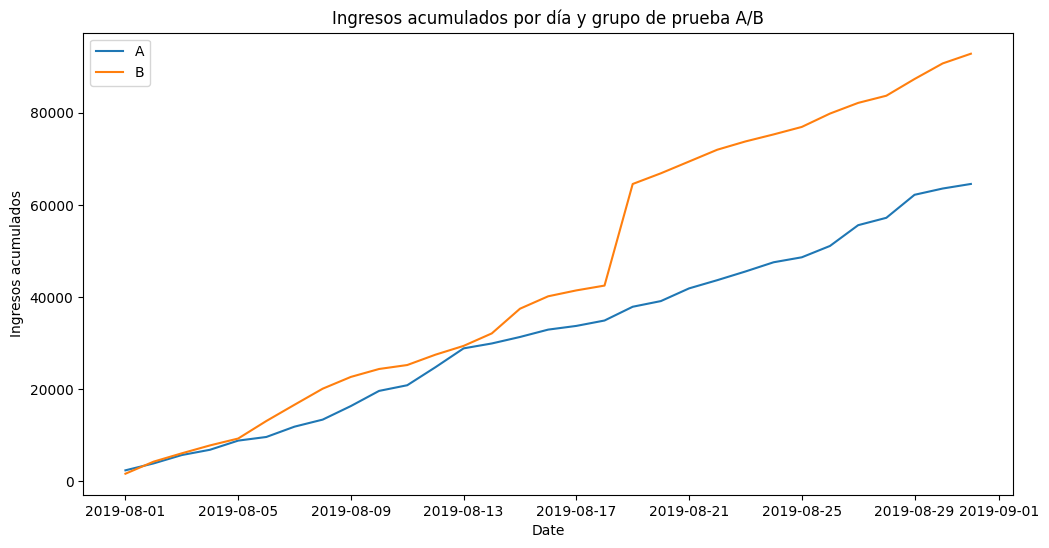

In [21]:
plt.figure(figsize=(12, 6))

# Trazar el gráfico de ingresos del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Trazar el gráfico de ingresos del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Date')
plt.ylabel('Ingresos acumulados')
plt.title('Ingresos acumulados por día y grupo de prueba A/B')
plt.legend()
plt.show()

Los ingresos aumentan constantemente durante toda la prueba.

Sin embargo, podemos ver que ambos grupos tienen picos en los ingresos en ciertos puntos, en el grupo B es más evidente. Esto puede implicar un aumento en el número de pedidos o la existencia de pedidos muy caros en la muestra. 

## Representamos gráficamente el tamaño de pedido promedio acumulado por grupo.

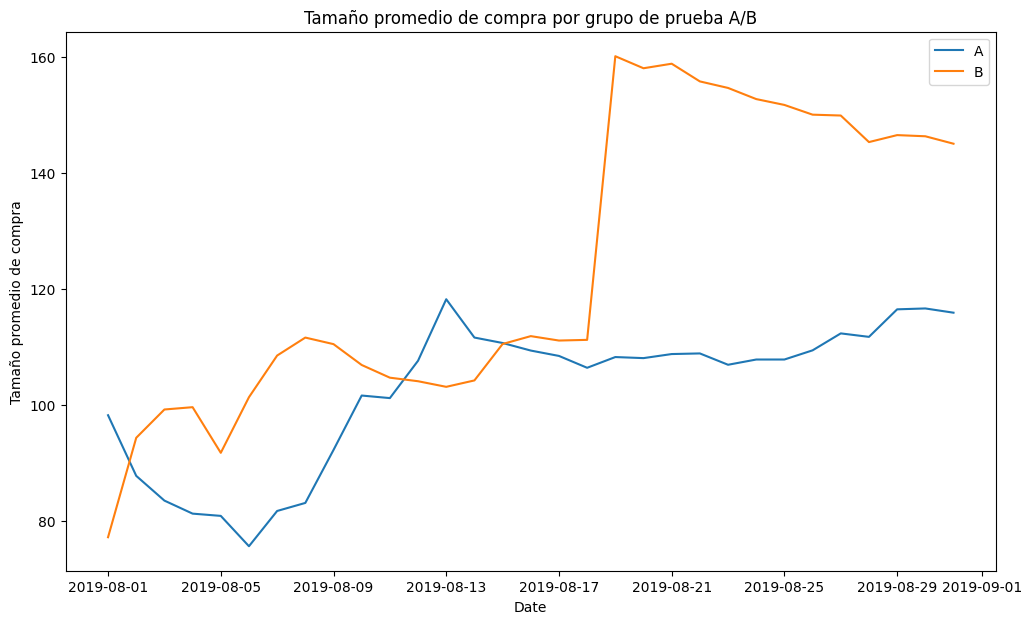

In [22]:

plt.figure(figsize=(12, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Date')
plt.ylabel('Tamaño promedio de compra')
plt.title('Tamaño promedio de compra por grupo de prueba A/B')
plt.legend()

Ambos grupos se estabilizan hacia el final de la prueba, sin embargo, el grupo B presenta una tendencia a la baja; mientras que el grupo A parece ir en incremento. De igual modo, observamos algunos picos en donde los pedidos debieron aumentar drásticamante.

## Representamos gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

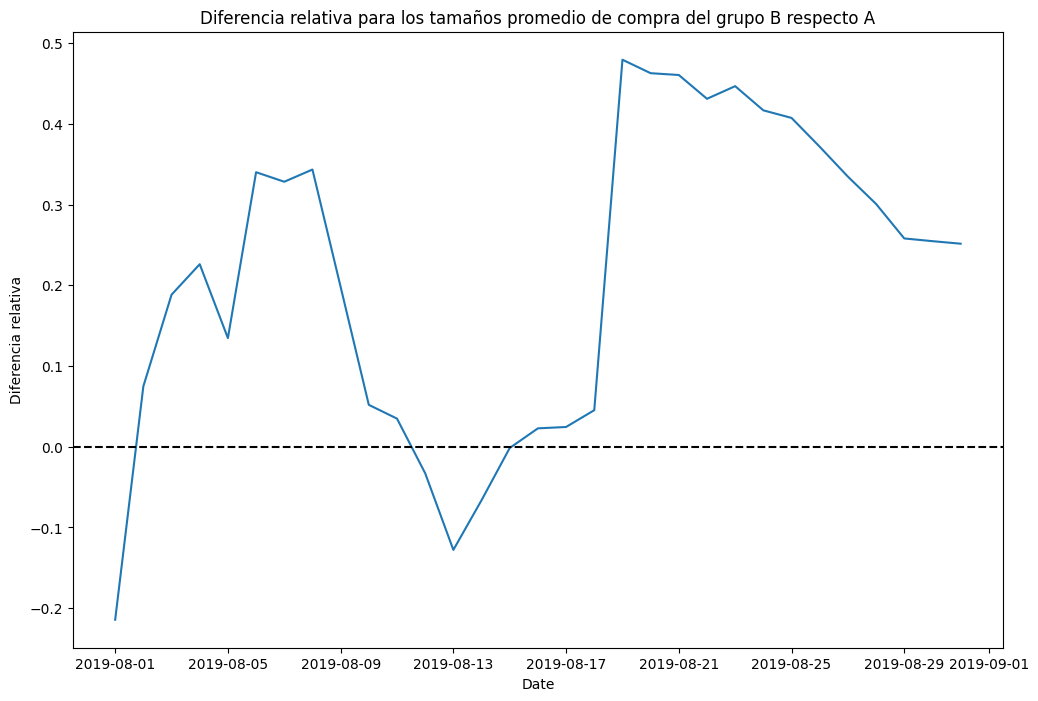

In [23]:

# reunir los datos en un DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# trazar un gráfico de diferencia relativa para los tamaños de compra promedio
plt.figure(figsize=(12, 8))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('Date')
plt.ylabel('Diferencia relativa')
plt.title('Diferencia relativa para los tamaños promedio de compra del grupo B respecto A')


# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--')

En varios puntos, la diferencia entre los segmentos aumenta. Esto nos confirma las sospechas de gráficos pasados; que deben haber algunos pedidos grandes y valores atípicos. 

## Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día.

In [24]:
# calcular la conversión acumulada
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# seleccionar datos en el grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# seleccionar datos en el grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']



In [25]:
print(cumulativeDataA['date'].min())
print(cumulativeDataA['date'].max())

print(cumulativeDataB['date'].min())
print(cumulativeDataB['date'].max())

print(cumulativeData['conversion'].min())
print(cumulativeData['conversion'].max())


2019-08-01 00:00:00
2019-08-31 00:00:00
2019-08-01 00:00:00
2019-08-31 00:00:00
0.029217427214536445
0.03685636856368564


In [26]:
print(cumulativeDataA['conversion'].mean())

print(cumulativeDataB['conversion'].mean())

0.03072780390193162
0.03385542374202302


(18109.0, 18139.0, 0.027, 0.038)

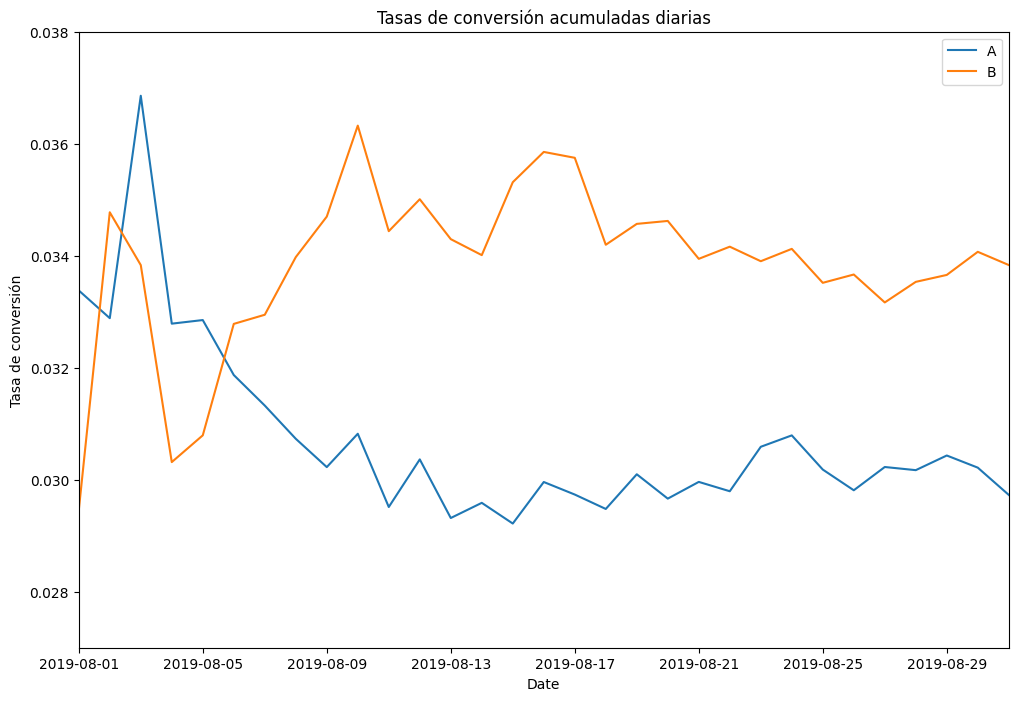

In [27]:
# trazar los gráficos
plt.figure(figsize=(12, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel('Date')
plt.ylabel('Tasa de conversión')
plt.title('Tasas de conversión acumuladas diarias')
plt.legend()

# establecer la escala de los ejes
plt.axis([(cumulativeData['date'].min()), (cumulativeData['date'].max()), 0.027, 0.038])

Los grupos fluctuaron al inicio, siendo mayor el grupo A pero luego la tasa de conversión del grupo B aumentó antes de estabilizarse alrededor del 34% mientras que la tasa de conversión del grupo A disminuyó pero luego también se estabilizó alrededor del 30%.

## Traza un gráfico de dispersión del número de pedidos por usuario.

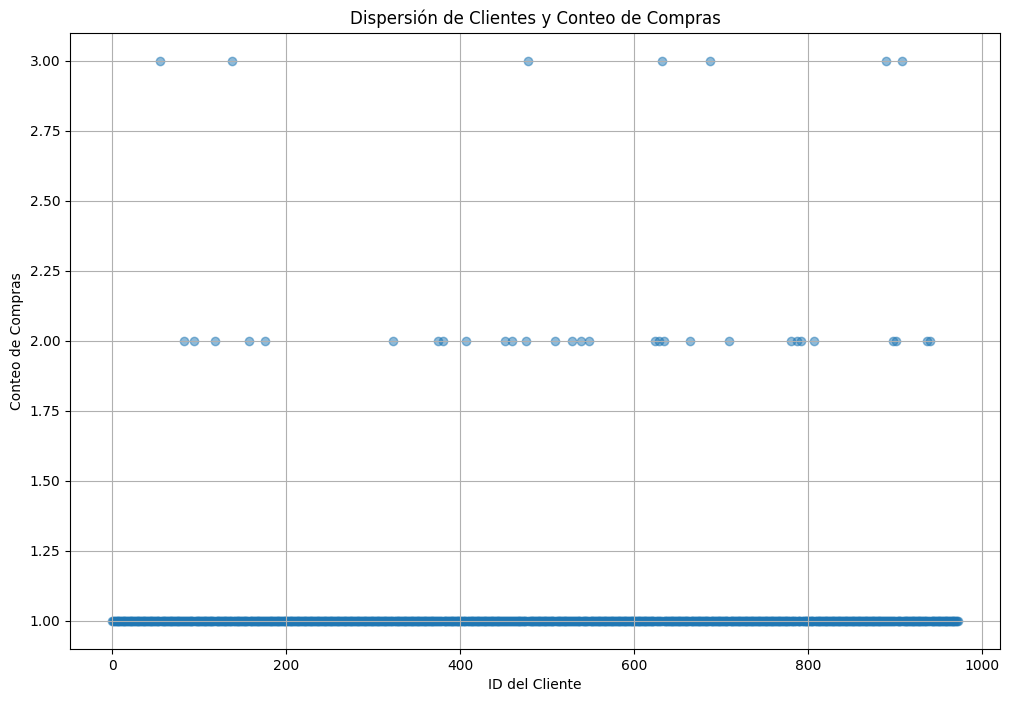

In [28]:
# Calcular el número de pedidos por usuario
orders_per_user = orders_fixed.groupby('visitorId')['transactionId'].nunique().reset_index()
orders_per_user.columns = ['visitorId', 'orders']

plt.figure(figsize=(12, 8))
plt.scatter(orders_per_user.index, orders_per_user['orders'], alpha=0.5)
plt.title('Dispersión de Clientes y Conteo de Compras')
plt.xlabel('ID del Cliente')
plt.ylabel('Conteo de Compras')
plt.grid(True)
plt.show()

Como podemos ver, la gran mayoría de clientes realizan un pedido, muy pocos vuelven a realizar compras. Aparentemente se tiene una a¿taza de retención de clientes muy baja.

## Calcula los percentiles 95 y 99 para el número de pedidos por usuario. 

In [29]:
print(print("Percentil 95 de pedidos por usuario:", np.percentile(orders_per_user['orders'], 95)))
print(print("Percentil 99 de pedidos por usuario:", np.percentile(orders_per_user['orders'], 99)))

Percentil 95 de pedidos por usuario: 1.0
None
Percentil 99 de pedidos por usuario: 2.0
None


Como podemos ver, el 95% de los clientes tienen al menos 1 pedido. Menos del 1% de nuestros clientes tienen más de 2 pedidos.
Por lo tanto, aquellos que tienen más de 1 pedido, se pueden considerar como anomalías.

## Traza un gráfico de dispersión de los precios de los pedidos.

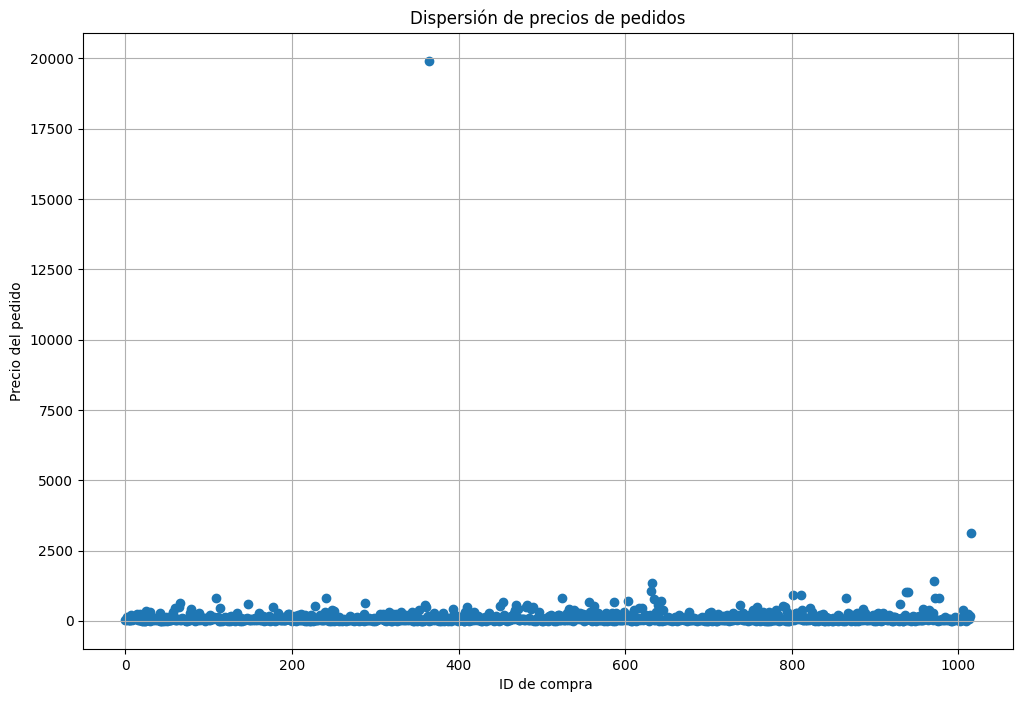

In [30]:
x_values = pd.Series(range(0, len(orders_fixed['revenue'])))
plt.figure(figsize=(12, 8))
plt.scatter(x_values, orders_fixed['revenue'])
plt.title('Dispersión de precios de pedidos')
plt.xlabel('ID de compra ')
plt.ylabel('Precio del pedido')
plt.grid(True)

Tal como se esperaba y sospechaba, hay varios pedidos grandes. Según el gráfico, podemos establecer el límite para pedidos anormales entre 500 y 1000. 

## Calcula los percentiles 95 y 99 de los precios de los pedidos. 

In [31]:
print(print("Percentil 95 del tamaño de pedidos:", np.percentile(orders_fixed['revenue'], 95)))
print(print("Percentil 99 del tamaño de pedidos:", np.percentile(orders_fixed['revenue'], 99)))

Percentil 95 del tamaño de pedidos: 414.275
None
Percentil 99 del tamaño de pedidos: 830.3
None


Podemos definir el límite del tamaño de pedido en 500, aquellos por encima de este valor se considerarán como anomalías. 

## Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto.

In [32]:
ordersByUsersA = orders_fixed[orders_fixed['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders_fixed[orders_fixed['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.011
0.160


La primera fila de la salida nos da el valor p 0.011, que es menor que 0.05. Entonces, podemos rechazar la hipótesis nula ya que si existe una diferencia estadísticamente significativa en la conversión entre los grupos. La ganancia de conversión del grupo B respecto al grupo A fue del 16%.  

## Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.

In [33]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders_fixed[orders_fixed['group']=='A']['revenue'], orders_fixed[orders_fixed['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders_fixed[orders_fixed['group']=='B']['revenue'].mean()/orders_fixed[orders_fixed['group']=='A']['revenue'].mean()-1))

0.862
0.278


El valor p es notablemente superior a 0.05 por lo que no existen motivos para rechazar la hipótesis nula y concluir que el tamaño medio de los pedidos difiere entre los grupos. 

Aunque el tamaño de pedido promedio para el grupo B es más grande que para el grupo A. Cerca del 28% mayor, en comparación.


## Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados.

Recordemos que los percentiles 95 y 99 para el tamaño de pedido promedio, que encontramos en secciones pasadas, fueron  $\$ 414.275\  y\  $\$ 830.3

Los percentiles 95 y 99 del número de pedidos por usuario fueron 1 y 2 pedidos.

Vamos a definir los usuarios anómalos como aquellos que realizan más de 1 pedido pedido o un pedido mayor a $500. Así eliminaremos el 5\% de los usuarios con mayor número de pedidos y entre el 1\% al 5\% de los usuarios con los pedidos más caros.

In [34]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['userId']], axis = 0)
usersWithExpensiveOrders = orders_fixed[orders_fixed['revenue'] > 500]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(10))
print(abnormalUsers.shape)

1099    148427295
928     204675465
33      249864742
684     358944393
36      366673373
648     382846391
51      406208401
67      522292794
58      611059232
64      678354126
dtype: int64
(72,)


Tenemos 72 usuarios anómalos.

In [35]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [36]:
# Aplicamos el criterio estadístico de Mann-Whitney a las muestras resultantes:

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.010
0.186


La primera fila de la salida nos da el valor p 0.010, que es menor que 0.05. Entonces, podemos rechazar la hipótesis nula ya que si existe una diferencia estadísticamente significativa en la conversión entre los grupos.

La ganancia de conversión del grupo B respecto al grupo A, aumentó hasta el 18%.

Los resultados de conversión casi no cambiaron.


## Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados.

In [37]:
# Calcular la significancia estadística utilizando la prueba de Mann-Whitney
u_stat, p_value = stats.mannwhitneyu(
    orders_fixed[np.logical_and(
        orders_fixed['group'] == 'A',
        np.logical_not(orders_fixed['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders_fixed[np.logical_and(
        orders_fixed['group'] == 'B',
        np.logical_not(orders_fixed['visitorId'].isin(abnormalUsers)))]['revenue']
)

# Imprimir el valor p con 3 decimales
print('{0:.3f}'.format(p_value))

# Calcular la diferencia relativa en el tamaño promedio de pedido entre los grupos
mean_revenue_a = orders_fixed[np.logical_and(
    orders_fixed['group'] == 'A',
    np.logical_not(orders_fixed['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
mean_revenue_b = orders_fixed[np.logical_and(
    orders_fixed['group'] == 'B',
    np.logical_not(orders_fixed['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
relative_difference = mean_revenue_b / mean_revenue_a - 1

# Imprimir la diferencia relativa con 3 decimales
print('{0:.3f}'.format(relative_difference))

0.992
0.016


El valor p aumentó de 86\% a 99\% por lo que es definitivo que NO debemos rechazar la hipótesis nula y concluir que el tamaño medio de los pedidos difiere entre los grupos. 

Pero ahora la diferencia entre los segmentos es del 16% en lugar del 28%.

Esto demuestra claramente cómo las anomalías afectaronn los resultados de la prueba A/B para identificar la significancia estadística de la diferencia en el tamaño promedio de pedido.

## Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 
1. Para la prueba, considera a uno de los grupos como líder. 
2. Para la prueba, concluye que no hay diferencia entre los grupos. 
3. Continúa la prueba.

Tanto los datos sin procesar como los filtrados, revelaron que podemos rechazar la hipótesis nula ya que si existe una diferencia estadísticamente significativa en la conversión entre los grupos. Encontrando un aumento de 18% aproximadamente para el grupo B respecto al grupo A.

Ni los datos sin procesar ni los filtrados revelaron diferencias estadísticamente significativas en el tamaño promedio de los pedidos entre los grupos. Se encontró que el pedido promedio de pedidos se mantuvo sin diferencia considerable para ambos grupos. Aunque el aumento para el grupo B fue de 16%, no muy alto.

El gráfico que muestra la conversión de los grupos nos dice que los resultados del grupo B son mejores.

El gráfico que muestra la diferencia en el tamaño medio de los pedidos entre los grupos nos dice que los resultados de los grupos son iguales, si no consideramos los datos anómalos.

Basándonos en estos hechos, podemos concluir que la prueba fue exitosa parcialmente, en la tasa de conversión, consideramos que la mejora es pequeña, sin embargo, mejora es mejora. Consideramos al grupo B como líder. La prueba podría detenerse.